In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.graph_objs import Scatter,Layout
import plotly
import plotly.offline
from plotly.offline import plot_mpl
import plotly.graph_objs as go
import plotly.figure_factory as ff

#setting offilne
plotly.offline.init_notebook_mode(connected=True)

# 中美汇率

In [2]:
df = pd.read_excel("../相关性系数/日维度关键词热度排序总表.xlsx")
df.head()

,日期,关键词,系数,排名
0,2020-01-01,2020,0.110534,1
1,2020-01-01,跨年,0.083063,2
2,2020-01-01,烟花,0.051747,3
3,2020-01-01,贺军翔,0.032861,4
4,2020-01-01,舞台,0.031878,5


In [5]:
df1 = pd.read_excel("../相关性系数/相关系数排名-中美汇率.xlsx").head(100)
df2 = df.pivot_table(index='关键词',columns='日期',values='系数',aggfunc='sum').fillna(0)
df2 = df2.loc[df1['关键词'],:]
df2

日期,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2021-12-22,2021-12-23,2021-12-24,2021-12-25,2021-12-26,2021-12-27,2021-12-28,2021-12-29,2021-12-30,2021-12-31
关键词,,,,,,,,,,,,,,,,,,,,,
美国,0.000000,0.000000,0.010290,0.033193,0.017324,0.016815,0.037970,0.042348,0.051601,0.007305,...,0.004346,0.000000,0.000038,0.002676,0.000000,0.007717,0.015005,0.006471,0.006734,0.020580
口罩,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027081,0.015551,0.000000,0.000000,...,0.000000,0.000000,0.000065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
武汉,0.000301,0.011621,0.008366,0.002468,0.022405,0.012669,0.002154,0.007265,0.027721,0.000000,...,0.000000,0.001609,0.000000,0.000000,0.000000,0.000000,0.003299,0.000000,0.000000,0.000000
湖北,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
开学,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
传闻中,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
分享,0.000000,0.000000,0.000798,0.000000,0.000252,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001134,0.000000,0.000000,0.000000,0.000000,0.000000,0.016253,0.002807,0.001153,0.000000
周放,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Text(0, 0.5, 'clustering variance')

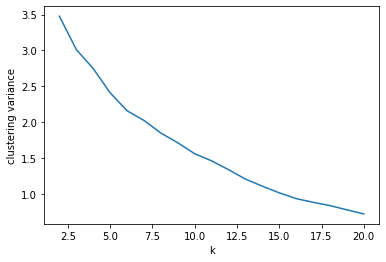

In [6]:
variance_list = []
for k in range(2,21):
    df2 = df2.iloc[:,:-1]
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(df2)
    variance_list.append(model.inertia_)
    df2['label'] = model.fit_predict(df2)
    df3 = (df2.reset_index())[['关键词','label']]
    cluster_group = dict()
    for i in df3['label'].unique():
        cluster_group[i] = list(df3[df3['label'] == i]['关键词'])
    
    df3.to_excel('./中美汇率/{}分类聚类结果.xlsx'.format(k),index=False)
    pd.Series(cluster_group).to_excel('./列表格式/中美汇率/{}分类聚类结果.xlsx'.format(k))

sns.lineplot(x=np.arange(2,21),y=variance_list)
plt.xlabel("k")
plt.ylabel("clustering variance")

In [7]:
dendro = ff.create_dendrogram(df2.iloc[:,:-1],orientation='left',labels=list(df2.index))
dendro['layout'].update({'width':1000, 'height':5000})
plotly.offline.plot(dendro, image='png',filename='clustering-中美汇率100')

/opt/anaconda3/lib/python3.7/site-packages/plotly/offline/offline.py:563: UserWarning:

Your filename `clustering-中美汇率100` didn't end with .html. Adding .html to the end of your file.



'clustering-中美汇率100.html'

## 前100

In [45]:
df4 = pd.read_excel('../相关性系数/相关系数排名-中美汇率.xlsx')
df4.head()

,关键词,相关系数,相关系数（绝对值）
0,回应,0.288236,0.288236
1,美国,0.270716,0.270716
2,新冠,0.247033,0.247033
3,中国,0.206678,0.206678
4,确诊,0.196281,0.196281


In [46]:
column_name = list(df4['关键词'])[:100]

dendro = ff.create_dendrogram(df2.loc[column_name],orientation='left',labels=list(df2.loc[column_name].index))
dendro['layout'].update({'width':1000, 'height':2000})
plotly.offline.plot(dendro, image='png',filename='clustering-中美汇率100')

/opt/anaconda3/lib/python3.7/site-packages/plotly/offline/offline.py:563: UserWarning:

Your filename `clustering-中美汇率100` didn't end with .html. Adding .html to the end of your file.



'clustering-中美汇率100.html'

# 上证综指

In [8]:
df = pd.read_excel("../相关性系数/日维度关键词热度排序总表.xlsx")
df.head()

,日期,关键词,系数,排名
0,2020-01-01,2020,0.110534,1
1,2020-01-01,跨年,0.083063,2
2,2020-01-01,烟花,0.051747,3
3,2020-01-01,贺军翔,0.032861,4
4,2020-01-01,舞台,0.031878,5


In [10]:
df1 = pd.read_excel("../相关性系数/相关系数排名-上证综指.xlsx").head(100)
df2 = df.pivot_table(index='关键词',columns='日期',values='系数',aggfunc='sum').fillna(0)
df2 = df2.loc[df1['关键词'],:]
df2

日期,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2021-12-22,2021-12-23,2021-12-24,2021-12-25,2021-12-26,2021-12-27,2021-12-28,2021-12-29,2021-12-30,2021-12-31
关键词,,,,,,,,,,,,,,,,,,,,,
口罩,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027081,0.015551,0.000000,0.000000,...,0.000000,0.000000,0.000065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
武汉,0.000301,0.011621,0.008366,0.002468,0.022405,0.012669,0.002154,0.007265,0.027721,0.000000,...,0.000000,0.001609,0.000000,0.000000,0.000000,0.000000,0.003299,0.000000,0.000000,0.000000
湖北,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
开学,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
美国,0.000000,0.000000,0.010290,0.033193,0.017324,0.016815,0.037970,0.042348,0.051601,0.007305,...,0.004346,0.000000,0.000038,0.002676,0.000000,0.007717,0.015005,0.006471,0.006734,0.020580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
宋凛,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
男子,0.000000,0.001084,0.005467,0.000000,0.000000,0.017400,0.000000,0.000000,0.004121,0.000659,...,0.009245,0.007749,0.019693,0.019331,0.017779,0.003849,0.015079,0.027498,0.006134,0.005266
毕业生,0.000000,0.000000,0.000741,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008047,0.000000,0.000000,0.000000


Text(0, 0.5, 'clustering variance')

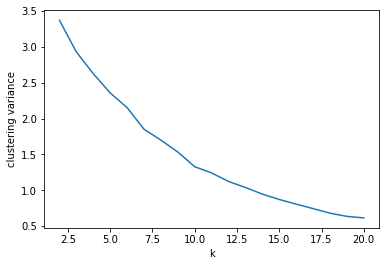

In [11]:
variance_list = []
for k in range(2,21):
    df2 = df2.iloc[:,:-1]
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(df2)
    variance_list.append(model.inertia_)
    df2['label'] = model.fit_predict(df2)
    df3 = (df2.reset_index())[['关键词','label']]
    cluster_group = dict()
    for i in df3['label'].unique():
        cluster_group[i] = list(df3[df3['label'] == i]['关键词'])

    df3.to_excel('./上证综指/{}分类聚类结果.xlsx'.format(k),index=False)
    pd.Series(cluster_group).to_excel('./列表格式/上证综指/{}分类聚类结果.xlsx'.format(k))

sns.lineplot(x=np.arange(2,21),y=variance_list)
plt.xlabel("k")
plt.ylabel("clustering variance")

In [50]:
dendro = ff.create_dendrogram(df2.iloc[:,:-1],orientation='left',labels=list(df2.index))
dendro['layout'].update({'width':1000, 'height':5000})
plotly.offline.plot(dendro, image='png',filename='clustering_上证综指500')

/opt/anaconda3/lib/python3.7/site-packages/plotly/offline/offline.py:563: UserWarning:

Your filename `clustering_上证综指500` didn't end with .html. Adding .html to the end of your file.



'clustering_上证综指500.html'

## 前100

In [51]:
df4 = pd.read_excel('../相关性系数/相关系数排名-上证综指.xlsx')
df4.head()

,关键词,相关系数,相关系数（绝对值）
0,回应,0.284406,0.284406
1,原来,0.277420,0.277420
2,男子,0.252857,0.252857
3,女子,0.241284,0.241284
4,上海,0.220267,0.220267


In [10]:
column_name = list(df4['关键词'])[:100]

dendro = ff.create_dendrogram(df2.loc[column_name],orientation='left',labels=list(df2.loc[column_name].index))
dendro['layout'].update({'width':1000, 'height':2000})
plotly.offline.plot(dendro, image='png',filename='clustering-上证综指100')

NameError: name 'df4' is not defined

# 新冠疫情

In [2]:
df = pd.read_excel("../相关性系数/日维度关键词热度排序总表.xlsx")
df.head()

,日期,关键词,系数,排名
0,2020-01-01,2020,0.110534,1
1,2020-01-01,跨年,0.083063,2
2,2020-01-01,烟花,0.051747,3
3,2020-01-01,贺军翔,0.032861,4
4,2020-01-01,舞台,0.031878,5


In [3]:
df1 = pd.read_excel("../相关性系数/相关系数排名-新冠疫情.xlsx").head(500)
df2 = df.pivot_table(index='关键词',columns='日期',values='系数',aggfunc='sum').fillna(0)
df2 = df2.loc[df1['关键词'],:]
df2

日期,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2021-12-22,2021-12-23,2021-12-24,2021-12-25,2021-12-26,2021-12-27,2021-12-28,2021-12-29,2021-12-30,2021-12-31
关键词,,,,,,,,,,,,,,,,,,,,,
上个,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
会花,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
高秀贞,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
泾县,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
咳嗽药,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
emmmm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
澳网,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.1%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'clustering variance')

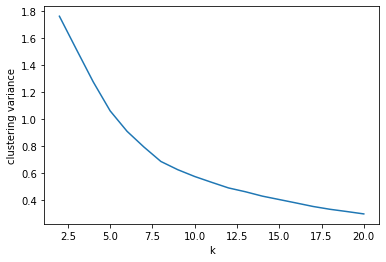

In [4]:
variance_list = []
for k in range(2,21):
    df2 = df2.iloc[:,:-1]
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(df2)
    variance_list.append(model.inertia_)
    df2['label'] = model.fit_predict(df2)
    df3 = (df2.reset_index())[['关键词','label']]
    cluster_group = dict()
    for i in df3['label'].unique():
        cluster_group[i] = list(df3[df3['label'] == i]['关键词'])

    df3.to_excel('./新冠疫情/{}分类聚类结果.xlsx'.format(k),index=False)
    pd.Series(cluster_group).to_excel('./列表格式/新冠疫情/{}分类聚类结果.xlsx'.format(k))
    
sns.lineplot(x=np.arange(2,21),y=variance_list)
plt.xlabel("k")
plt.ylabel("clustering variance")

In [59]:
dendro = ff.create_dendrogram(df2.iloc[:,:-1],orientation='left',labels=list(df2.index))
dendro['layout'].update({'width':1000, 'height':5000})
plotly.offline.plot(dendro, image='png',filename='clustering_新冠疫情500')

/opt/anaconda3/lib/python3.7/site-packages/plotly/offline/offline.py:563: UserWarning:

Your filename `clustering_新冠疫情500` didn't end with .html. Adding .html to the end of your file.



'clustering_新冠疫情500.html'

## 前100

In [60]:
df4 = pd.read_excel('../相关性系数/相关系数排名-新冠疫情.xlsx')
df4.head()

,关键词,相关系数,相关系数（绝对值）
0,上个,0.804323,0.804323
1,会花,0.799999,0.799999
2,高秀贞,0.793308,0.793308
3,泾县,0.792842,0.792842
4,咳嗽药,0.792779,0.792779


In [62]:
column_name = list(df4['关键词'])[:100]

dendro = ff.create_dendrogram(df2.loc[column_name],orientation='left',labels=list(df2.loc[column_name].index))
dendro['layout'].update({'width':1000, 'height':2000})
plotly.offline.plot(dendro, image='png',filename='clustering-新冠疫情100')

'clustering-新冠疫情100.html'